<a href="https://colab.research.google.com/github/TruongQuocTruong/CS114.L22.KHCL/blob/main/COLAB03_PREDICT_THE_FIANL_SCORE_6_62021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÁO CÁO BÀI COLAB_03 : DỰ ĐOÁN ĐIỂM CUỐI KỲ QUA QUÁ TRÌNH NỘP WECODE

NGÀY: 6/06/2021
THÀNH VIÊN NHÓM:


*   TRƯƠNG QUỐC TRƯỜNG
*   NGUYÊN QUANG TUẤN
*   ÂU THIÊN PHƯỚC



**Import các thư viện cần thiết, và dữ liệu vào notebook, qua Github.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline

import sklearn
import gdown
import math

from collections import Counter
from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm

# I: XỬ LÝ DỮ LIỆU

In [ ]:
# lấy bộ dataset từ link github dưới dạng raw
score_train = pd.read_csv('https://raw.githubusercontent.com/TruongQuocTruong/CS114.L22.KHCL/main/COLAB03/score_training.csv')
wecode = pd.read_csv('https://raw.githubusercontent.com/TruongQuocTruong/CS114.L22.KHCL/main/COLAB03/wecode.csv')

**Tổng quát dữ liệu, thông tin chi tiết về các tập dataset**

In [ ]:
# Hiện thị các bản ghi trong tập score_train
score_train.head(5)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [ ]:
# Thêm thông tin, kiểu dữ liệu, trạng thái của dữ liệu
score_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [ ]:
# Hiển thị các bản ghi của tập wecode
wecode.head(5)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [ ]:
# Thông tin, kiểu dữ liệu của các bản ghi
wecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


**Tổng quát một số feature quan trọng, lấy những feature cần thiết trong dataset để tạo bộ train.**

In [ ]:
def Score(data):
  if data['pre_score'] == 10000:
    return 1
  return 0
wecode['score'] = wecode.apply(Score,axis=1)

def Solved(data):
  if data['is_final'] == 1 and data['pre_score'] == 10000:
    return 1
  return 0
wecode['solved'] = wecode.apply(Solved,axis=1)

Group = wecode.groupby(by='user_id', sort= True)

In [ ]:
# Từ những thông tin tổng quát về dataset, ta thấy một số feature dạng số thực nhưng đang trong
# dtype<str>. Sau khi chọn ra một số feature cần sử dụng, ta định dạng lại dtype qua float
# is_final = 1 // pre_score = 10000
#SUBMIT = wecode[wecode['is_final'] ==1 ]
#SUBMIT = SUBMIT[SUBMIT['pre_score'] == 10000]
DATAWECODE = wecode.drop(labels='updated_at',axis =1)
DATAWECODE = DATAWECODE.drop(labels='created_at',axis =1)
DATAWECODE = DATAWECODE.drop(labels='language_id',axis =1)
DATAWECODE = DATAWECODE.drop(labels='status',axis =1)
DATAWECODE = DATAWECODE.drop(labels='coefficient',axis =1)
DATAWECODE = DATAWECODE.drop(labels='pre_score',axis =1)
DATAWECODE = DATAWECODE.drop(labels='is_final',axis =1)
DATAWECODE = DATAWECODE.drop(labels='problem_id',axis =1)
#DATAWECODE = DATAWECODE.drop(labels='assignment_id',axis =1)
DATAWECODE = DATAWECODE.drop(labels='id',axis =1)
DATAWECODE = DATAWECODE.drop(labels='file_name',axis =1)
DATAWECODE = DATAWECODE.drop(labels='solved',axis =1)
DATAWECODE = DATAWECODE.drop(labels='score',axis =1)
#Số bài tập
DATAWECODE = DATAWECODE.groupby(by=['user_id']).nunique()
DATAWECODE = DATAWECODE.rename(columns={'assignment_id':'total_assignment'})
#Số bài toán
user_id = wecode[['user_id','problem_id']]
DATAWECODE['total_problem'] = user_id.groupby(by=['user_id']).nunique()
#Số bài nộp đúng
user_id = wecode[['user_id','solved']]
DATAWECODE['total_completed'] = user_id.groupby(by=['user_id']).sum()
#Số lần submit
user_id = wecode[['user_id','problem_id']]
DATAWECODE['total_submit'] = user_id.groupby(by=['user_id']).count()
#Số lần pre_score = 1000
user_id = wecode[['user_id','score']]
DATAWECODE['total_pre_score'] = user_id.groupby(by=['user_id']).sum()
#Tổng điểm
user_id = wecode[['user_id','pre_score']]
DATAWECODE['total_score'] = Group.apply(lambda x: x[x['is_final'] == 1]['pre_score'].sum())

In [ ]:
DATAWECODE

,total_assignment,total_problem,total_completed,total_submit,total_pre_score,total_score
user_id,,,,,,
1,1,2,1,2,1,10000
4,1,41,37,54,44,370000
5,4,5,3,6,3,30000
6,4,88,85,130,89,850000
7,1,2,0,5,0,9209
...,...,...,...,...,...,...
1860,10,43,28,76,29,329665
1862,2,6,4,12,4,40000
1864,5,63,28,187,30,439741


**Thêm các feature cần thiết vào bảng FINAL_DATA**

In [ ]:
# Để dự đoán được điểm cuối kỳ của từng user_ID, ta sẽ xét xem số lần nộp bài đúng của từng user_ID
# Có rất nhiều yếu tố ảnh hưởng đến điểm CK, nhưng trong trường hợp này, ta xét user_ID nào có nhiều
# lần nộp bài nhất thì điểm sẽ tỉ lể thuận với số lần đó
SCORE = score_train.drop(labels='GK',axis =1)
SCORE = SCORE.drop(labels='TBTL',axis =1)
SCORE = SCORE.drop(labels='QT',axis =1)
SCORE = SCORE.drop(labels='TBM',axis =1)
SCORE = SCORE.drop(labels='TH',axis =1)
temp1 = pd.to_numeric(SCORE['CK'],errors = 'coerce')
SCORE = SCORE.drop(labels='CK',axis =1)
SCORE['CK'] = temp1
CK = SCORE
CK = CK.rename(columns={'id':'user_id'})
CK = CK.set_index('user_id')

TRAIN_DATA = pd.concat([DATAWECODE,CK],axis =1).reset_index().dropna()

In [ ]:
TRAIN_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 10 to 1278
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           806 non-null    int64  
 1   total_assignment  806 non-null    float64
 2   total_problem     806 non-null    float64
 3   total_completed   806 non-null    float64
 4   total_submit      806 non-null    float64
 5   total_pre_score   806 non-null    float64
 6   total_score       806 non-null    float64
 7   CK                806 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 56.7 KB


In [ ]:
TRAIN_DATA.describe()

,user_id,total_assignment,total_problem,total_completed,total_submit,total_pre_score,total_score,CK
count,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,8.060000e+02,806.000000
mean,887.772953,11.312655,89.194789,86.682382,238.959057,90.797767,8.934458e+05,6.172457
std,506.772049,6.659902,48.871976,52.877130,163.182106,56.104517,5.392315e+05,2.243702
min,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,453.250000,9.000000,57.000000,50.000000,120.000000,52.000000,5.215140e+05,4.500000
50%,866.500000,11.000000,86.000000,83.000000,210.000000,85.000000,8.409440e+05,6.500000
75%,1357.500000,14.000000,104.750000,104.750000,320.750000,111.000000,1.075666e+06,8.000000
max,1865.000000,36.000000,212.000000,314.000000,1359.000000,331.000000,3.168763e+06,10.000000


# TRỰC QUAN HOÁ DỮ LIỆU

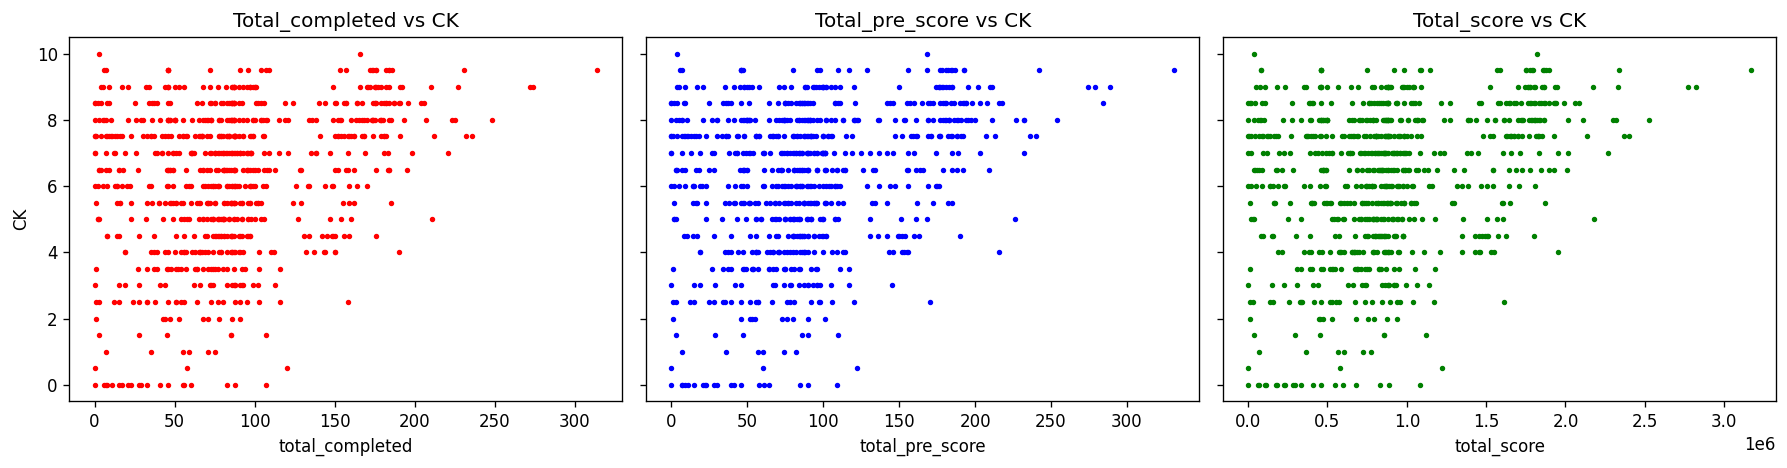

In [ ]:
#Biểu đồ thể hiện sự liên quan giữa các feature với điểm CK
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4), sharey = True, dpi = 120)

ax1.scatter(TRAIN_DATA['total_completed'], TRAIN_DATA['CK'], 5, color='r')
ax2.scatter(TRAIN_DATA['total_pre_score'], TRAIN_DATA['CK'],5, color ='b')
ax3.scatter(TRAIN_DATA['total_score'], TRAIN_DATA['CK'],5, color='g')

ax1.set(title='Total_completed vs CK', xlabel = 'total_completed', ylabel = 'CK')
ax2.set(title='Total_pre_score vs CK', xlabel = 'total_pre_score')
ax3.set(title='Total_score vs CK', xlabel = 'total_score')
plt.tight_layout()
plt.show()

# TRAIN MODEL VÀ DỰ ĐOÁN ĐIỂM

**Xử lý data**

In [ ]:
X = TRAIN_DATA[['total_assignment',	
                'total_problem',	
                'total_completed',	
                'total_submit',	
                'total_pre_score',	
                'total_score']]
Y = TRAIN_DATA['CK']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Theo nhận xét của các bạn và thầy, có thể bài này sẽ được thực hiện trên 2 dạng bài toán:


*   Linear Regression
*   Support Vector Machine

Tiến hành train model và tính toán trên cả 2 dạng bài toán



**Support Vector Machine**


In [ ]:
SVMMODEL = svm.SVR().fit(X_train, y_train)
#The average time
print("Average of y_test:", np.average(y_test))

# Mean Square Error of Data Test 
y_pred_svm = SVMMODEL.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred_svm)
print("MSE of Data Test:", mse)

error = math.sqrt(mse) / np.average(y_test)
print("Error(%):", error*100)

Average of y_test: 6.2592592592592595
MSE of Data Test: 4.447715119229711
Error(%): 33.69345453514848


**Linear Regrssion**

In [ ]:
LNMODEL = LinearRegression().fit(X_train, y_train)
LNMODEL.intercept_ , CK_lr.coef_

(5.520555897055645,
 array([-1.24412445e-01, -9.56053542e-03, -1.00719242e-01,  2.44710788e-03,
         4.52405131e-03,  1.18776868e-05]))

In [ ]:
y_pred = LNMODEL.predict(X_train)
mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
print("MSE of Data Train:", mse)

MSE of Data Train: 4.058750803393181


In [ ]:
# The everage time
print("Average of y_test:", np.average(y_test))

# Mean Square Error of Data Test 
y_pred = LNMODEL.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("MSE of Data Test:", mse)

error = math.sqrt(mse) / np.average(y_test)
print("Error(%):", error*100)

Average of y_test: 6.2592592592592595
MSE of Data Test: 3.8293461583613726
Error(%): 31.263627885649054


Qua thông số Mean square error của cả 2 quá trình train model:


*   Linear Regression: 4.44
*   SVM: 3.83

Nhận thấy trong thang điểm 10, với mức MSE như vậy chưa được tốt cho MODEL. Nhóm sẽ tìm hiểu, cải thiện lại MODEL và update bài lên tiếp ạ!



**LINK THAM KHẢO**


*   https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
*   https://allaravel.com/blog/ve-do-thi-trong-python-voi-thu-vien-matplotlib
*   https://vimentor.com/vi/lesson/tien-xu-ly-du-lieu-trong-linh-vuc-hoc-may-phan-1
*   https://scikit-learn.org/stable/modules/svm.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

